# **Importation des packages**

In [1]:
import sys
import gensim as gs
from gensim.corpora import Dictionary
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel
from gensim.parsing.preprocessing import STOPWORDS as SW
from pprint import pprint

import pyLDAvis.gensim_models
import snscrape.modules.twitter as sntwitter
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

import chart_studio
import chart_studio.plotly as py 
import chart_studio.tools as tls
import matplotlib.pyplot as plt 

import json, requests, emoji, regex, re, string
from collections import Counter
import numpy as np
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import pyLDAvis.gensim_models
import snscrape.modules.twitter as sntwitter
from sklearn.model_selection import GridSearchCV
from imp import reload

from wordcloud import STOPWORDS
from nltk.corpus import stopwords
stopwords = set(stopwords.words('french'))

import spacy as scy
from spacy.tokenizer import Tokenizer
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

%matplotlib inline
import warnings
warnings.filterwarnings('ignore','int', category=DeprecationWarning)

c:\Users\PEGON\Desktop\textmining\venv\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


# **I. Scrapping of Tweets**

### **I.1 Scrapping of randoms tweets**

* Initialization of a for loop to analyze the tweets
* Different parameters (language, date, likes, verified or not, etc...)

In [ ]:
# 18/12/2020

tweets_random = []
tweets_likee = []

for g,tweet in enumerate(sntwitter.TwitterSearchScraper('#bitcoin since:2020-12-17 until:2020-12-20 lang:en').get_items()):
    if g>83333:
        break
    
    elif tweet.likeCount > 200: # On récupère tous les tweets au dessus de 200 like
        tweets_likee.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.likeCount, tweet.user.displayname, tweet.user.verified, tweet.lang])
    else :
        tweets_random.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.likeCount, tweet.user.displayname, tweet.user.verified, tweet.lang])

label = ['Datetime', 'Id Tweet', 'Text', 'Username', 'Like Count', 'Display Name', 'Vérifié', 'Language']

df_tweets_random = pd.DataFrame(tweets_random, columns=label)
df_tweets_likee = pd.DataFrame(tweets_likee, columns=label)
#df_tweets_vérifié = pd.DataFrame(tweet_vérifié, columns=label)

# Exportation en .csv des df finaux

df_tweets_random.to_csv('scrp_random_2020_12_18.csv')
df_tweets_likee.to_csv('scrp_like_2020_12_18.csv')

# Concaténation de nos 4 dfs
df_twitter0 = pd.concat([df_tweets_random, df_tweets_likee], axis=0, ignore_index=True)

# Exportation en .csv de l'ensemble du jeu de donné
df_twitter0.to_csv('T_FINAL_1.csv')
df_twitter0.head(5)

In [ ]:
# 08/01/2021

tweets_random1 = []
tweets_likee1 = []

for g,tweet in enumerate(sntwitter.TwitterSearchScraper('#bitcoin since:2021-01-07 until:2021-01-10 lang:en').get_items()):
    if g>83333:
        break
    
    elif tweet.likeCount > 200: # On récupère tous les tweets au dessus de 200 like
        tweets_likee1.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.likeCount, tweet.user.displayname, tweet.user.verified, tweet.lang])
    else :
        tweets_random1.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.likeCount, tweet.user.displayname, tweet.user.verified, tweet.lang])

label = ['Datetime', 'Id Tweet', 'Text', 'Username', 'Like Count', 'Display Name', 'Vérifié', 'Language']

df_tweets_random1 = pd.DataFrame(tweets_random1, columns=label)
df_tweets_likee1 = pd.DataFrame(tweets_likee1, columns=label)

# Exportation en .csv des df finaux

df_tweets_random1.to_csv('scrp_random_2021_01_08.csv')
df_tweets_likee1.to_csv('scrp_like_2021_01_08.csv')

# Concaténation de nos 4 dfs
df_twitter1 = pd.concat([df_tweets_random1, df_tweets_likee1], axis=0, ignore_index=True)

# Exportation en .csv de l'ensemble du jeu de donné
df_twitter1.to_csv('T_FINAL_2.csv')
df_twitter1.head(5)

In [ ]:
# 22/01/2021

tweets_random2 = []
tweets_likee2 = []

for g,tweet in enumerate(sntwitter.TwitterSearchScraper('#bitcoin since:2021-01-20 until:2021-01-23 lang:en').get_items()):
    if g>83333:
        break
    
    elif tweet.likeCount > 200: # On récupère tous les tweets au dessus de 200 like
        tweets_likee2.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.likeCount, tweet.user.displayname, tweet.user.verified, tweet.lang])
    else :
        tweets_random2.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.likeCount, tweet.user.displayname, tweet.user.verified, tweet.lang])


label = ['Datetime', 'Id Tweet', 'Text', 'Username', 'Like Count', 'Display Name', 'Vérifié', 'Language']

df_tweets_random2 = pd.DataFrame(tweets_random2, columns=label)
df_tweets_likee2 = pd.DataFrame(tweets_likee2, columns=label)

# Exportation en .csv des df finaux

df_tweets_random2.to_csv('scrp_random_2021_01_22.csv')
df_tweets_likee2.to_csv('scrp_like_2021_01_22.csv')

# Concaténation de nos 4 dfs
df_twitter2 = pd.concat([df_tweets_random2, df_tweets_likee2], axis=0, ignore_index=True)

# Exportation en .csv de l'ensemble du jeu de donné
df_twitter2.to_csv('T_FINAL_3.csv')
df_twitter2.head(5)

In [ ]:
# 15/04/2021

tweets_random2 = []
tweets_likee2 = []

for g,tweet in enumerate(sntwitter.TwitterSearchScraper('#bitcoin since:2021-04-14 until:2021-04-17 lang:en').get_items()):
    if g>83333:
        break
    
    elif tweet.likeCount > 200: # On récupère tous les tweets au dessus de 200 like
        tweets_likee2.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.likeCount, tweet.user.displayname, tweet.user.verified, tweet.lang])
    else :
        tweets_random2.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.likeCount, tweet.user.displayname, tweet.user.verified, tweet.lang])

label = ['Datetime', 'Id Tweet', 'Text', 'Username', 'Like Count', 'Display Name', 'Vérifié', 'Language']

df_tweets_random3 = pd.DataFrame(tweets_random2, columns=label)
df_tweets_likee3 = pd.DataFrame(tweets_likee2, columns=label)

# Exportation en .csv des df finaux

df_tweets_random3.to_csv('scrp_random_2021_04_15.csv')
df_tweets_likee3.to_csv('scrp_like_2021_04_15.csv')

# Concaténation de nos 4 dfs
df_twitter3 = pd.concat([df_tweets_random3, df_tweets_likee3], axis=0, ignore_index=True)

# Exportation en .csv de l'ensemble du jeu de donné
df_twitter3.to_csv('T_FINAL_4.csv')
df_twitter3.head(5)

In [ ]:
# 18/05/2021

tweets_random2 = []
tweets_likee2 = []

for g,tweet in enumerate(sntwitter.TwitterSearchScraper('#bitcoin since:2021-05-17 until:2021-05-20 lang:en').get_items()):
    if g>83333:
        break
    
    elif tweet.likeCount > 200: # On récupère tous les tweets au dessus de 200 like
        tweets_likee2.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.likeCount, tweet.user.displayname, tweet.user.verified, tweet.lang])
    else :
        tweets_random2.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.likeCount, tweet.user.displayname, tweet.user.verified, tweet.lang])

label = ['Datetime', 'Id Tweet', 'Text', 'Username', 'Like Count', 'Display Name', 'Vérifié', 'Language']

df_tweets_random4 = pd.DataFrame(tweets_random2, columns=label)
df_tweets_likee4 = pd.DataFrame(tweets_likee2, columns=label)

# Exportation en .csv des df finaux

df_tweets_random4.to_csv('scrp_random_2021_05_18.csv')
df_tweets_likee4.to_csv('scrp_like_2021_05_18.csv')

# Concaténation de nos 4 dfs
df_twitter4 = pd.concat([df_tweets_random4, df_tweets_likee4], axis=0, ignore_index=True)

# Exportation en .csv de l'ensemble du jeu de donné
df_twitter4.to_csv('T_FINAL_5.csv')
df_twitter4.head(5)

In [ ]:
# 18/07/2021

tweets_random2 = []
tweets_likee2 = []

for g,tweet in enumerate(sntwitter.TwitterSearchScraper('#bitcoin since:2021-07-17 until:2021-07-20 lang:en').get_items()):
    if g>83333:
        break
    
    elif tweet.likeCount > 200: # On récupère tous les tweets au dessus de 200 like
        tweets_likee2.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.likeCount, tweet.user.displayname, tweet.user.verified, tweet.lang])
    else :
        tweets_random2.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.likeCount, tweet.user.displayname, tweet.user.verified, tweet.lang])

label = ['Datetime', 'Id Tweet', 'Text', 'Username', 'Like Count', 'Display Name', 'Vérifié', 'Language']

df_tweets_random5 = pd.DataFrame(tweets_random2, columns=label)
df_tweets_likee5 = pd.DataFrame(tweets_likee2, columns=label)

# Exportation en .csv des df finaux

df_tweets_random5.to_csv('scrp_random_2021_07_18.csv')
df_tweets_likee5.to_csv('scrp_like_2021_07_18.csv')

# Concaténation de nos 4 dfs
df_twitter5 = pd.concat([df_tweets_random5, df_tweets_likee5], axis=0, ignore_index=True)

# Exportation en .csv de l'ensemble du jeu de donné
df_twitter5.to_csv('T_FINAL_6.csv')
df_twitter5.head(5)

In [ ]:
# 24/09/2021

tweets_random2 = []
tweets_likee2 = []

for g,tweet in enumerate(sntwitter.TwitterSearchScraper('#bitcoin since:2021-09-23 until:2021-09-26 lang:en').get_items()):
    if g>83333:
        break
    
    elif tweet.likeCount > 200: # On récupère tous les tweets au dessus de 200 like
        tweets_likee2.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.likeCount, tweet.user.displayname, tweet.user.verified, tweet.lang])
    else :
        tweets_random2.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.likeCount, tweet.user.displayname, tweet.user.verified, tweet.lang])

label = ['Datetime', 'Id Tweet', 'Text', 'Username', 'Like Count', 'Display Name', 'Vérifié', 'Language']

df_tweets_random6 = pd.DataFrame(tweets_random2, columns=label)
df_tweets_likee6 = pd.DataFrame(tweets_likee2, columns=label)

# Exportation en .csv des df finaux

df_tweets_random6.to_csv('scrp_random_2021_09_24.csv')
df_tweets_likee6.to_csv('scrp_like_2021_09_24.csv')

# Concaténation de nos 4 dfs
df_twitter6 = pd.concat([df_tweets_random6, df_tweets_likee6], axis=0, ignore_index=True)

# Exportation en .csv de l'ensemble du jeu de donné
df_twitter6.to_csv('T_FINAL_7.csv')
df_twitter6.head(5)

In [ ]:
# 10/11/2021

tweets_random2 = []
tweets_likee2 = []

for g,tweet in enumerate(sntwitter.TwitterSearchScraper('#bitcoin since:2021-10-10 until:2021-10-13 lang:en').get_items()):
    if g>83333:
        break
    
    elif tweet.likeCount > 200: # On récupère tous les tweets au dessus de 200 like
        tweets_likee2.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.likeCount, tweet.user.displayname, tweet.user.verified, tweet.lang])
    else :
        tweets_random2.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.likeCount, tweet.user.displayname, tweet.user.verified, tweet.lang])

label = ['Datetime', 'Id Tweet', 'Text', 'Username', 'Like Count', 'Display Name', 'Vérifié', 'Language']

df_tweets_random7 = pd.DataFrame(tweets_random2, columns=label)
df_tweets_likee7 = pd.DataFrame(tweets_likee2, columns=label)

# Exportation en .csv des df finaux

df_tweets_random7.to_csv('scrp_random_2021_11_10.csv')
df_tweets_likee7.to_csv('scrp_like_2021_11_10.csv')

# Concaténation de nos 4 dfs
df_twitter7 = pd.concat([df_tweets_random7, df_tweets_likee7], axis=0, ignore_index=True)

# Exportation en .csv de l'ensemble du jeu de donné
df_twitter7.to_csv('T_FINAL_8.csv')
df_twitter7.head(5)

In [ ]:
# 25/01/2022

tweets_random2 = []
tweets_likee2 = []

for g,tweet in enumerate(sntwitter.TwitterSearchScraper('#bitcoin since:2022-01-24 until:2022-01-27 lang:en').get_items()):
    if g>83333:
        break
    
    elif tweet.likeCount > 200: # On récupère tous les tweets au dessus de 200 like
        tweets_likee2.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.likeCount, tweet.user.displayname, tweet.user.verified, tweet.lang])
    else :
        tweets_random2.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.likeCount, tweet.user.displayname, tweet.user.verified, tweet.lang])

label = ['Datetime', 'Id Tweet', 'Text', 'Username', 'Like Count', 'Display Name', 'Vérifié', 'Language']

df_tweets_random8 = pd.DataFrame(tweets_random2, columns=label)
df_tweets_likee8 = pd.DataFrame(tweets_likee2, columns=label)

# Exportation en .csv des df finaux

df_tweets_random8.to_csv('scrp_random_2022_01_25.csv')
df_tweets_likee8.to_csv('scrp_like_2022_01_25.csv')

# Concaténation de nos 4 dfs
df_twitter8 = pd.concat([df_tweets_random8, df_tweets_likee8], axis=0, ignore_index=True)

# Exportation en .csv de l'ensemble du jeu de donné
df_twitter8.to_csv('T_FINAL_9.csv')
df_twitter8.head(5)

In [ ]:
# 06/04/2022

tweets_random2 = []
tweets_likee2 = []

for g,tweet in enumerate(sntwitter.TwitterSearchScraper('#bitcoin since:2022-04-05 until:2022-04-08 lang:en').get_items()):
    if g>83333:
        break
    
    elif tweet.likeCount > 200: # On récupère tous les tweets au dessus de 200 like
        tweets_likee2.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.likeCount, tweet.user.displayname, tweet.user.verified, tweet.lang])
    else :
        tweets_random2.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.likeCount, tweet.user.displayname, tweet.user.verified, tweet.lang])

label = ['Datetime', 'Id Tweet', 'Text', 'Username', 'Like Count', 'Display Name', 'Vérifié', 'Language']

df_tweets_random9 = pd.DataFrame(tweets_random2, columns=label)
df_tweets_likee9 = pd.DataFrame(tweets_likee2, columns=label)

# Exportation en .csv des df finaux

df_tweets_random9.to_csv('scrp_random_2022_04_06.csv')
df_tweets_likee9.to_csv('scrp_like_2022_04_06.csv')

# Concaténation de nos 4 dfs
df_twitter9 = pd.concat([df_tweets_random9, df_tweets_likee9], axis=0, ignore_index=True)

# Exportation en .csv de l'ensemble du jeu de donné
df_twitter9.to_csv('T_FINAL_10.csv')
df_twitter9.head(5)

In [ ]:
# 20/06/2022

tweets_random2 = []
tweets_likee2 = []

for g,tweet in enumerate(sntwitter.TwitterSearchScraper('#bitcoin since:2022-06-19 until:2022-06-22 lang:en').get_items()):
    if g>83333:
        break
    
    elif tweet.likeCount > 200: # On récupère tous les tweets au dessus de 200 like
        tweets_likee2.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.likeCount, tweet.user.displayname, tweet.user.verified, tweet.lang])
    else :
        tweets_random2.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.likeCount, tweet.user.displayname, tweet.user.verified, tweet.lang])

label = ['Datetime', 'Id Tweet', 'Text', 'Username', 'Like Count', 'Display Name', 'Vérifié', 'Language']

df_tweets_random10 = pd.DataFrame(tweets_random2, columns=label)
df_tweets_likee10 = pd.DataFrame(tweets_likee2, columns=label)

# Exportation en .csv des df finaux

df_tweets_random10.to_csv('scrp_random_2022_06_20.csv')
df_tweets_likee10.to_csv('scrp_like_2022_06_20.csv')

# Concaténation de nos 4 dfs
df_twitter10 = pd.concat([df_tweets_random10, df_tweets_likee10], axis=0, ignore_index=True)

# Exportation en .csv de l'ensemble du jeu de donné
df_twitter10.to_csv('T_FINAL_11.csv')
df_twitter10.head(5)

In [ ]:
# 11/07/2022

tweets_random2 = []
tweets_likee2 = []

for g,tweet in enumerate(sntwitter.TwitterSearchScraper('#bitcoin since:2022-07-10 until:2022-07-13 lang:en').get_items()):
    if g>83333:
        break
    
    elif tweet.likeCount > 200: # On récupère tous les tweets au dessus de 200 like
        tweets_likee2.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.likeCount, tweet.user.displayname, tweet.user.verified, tweet.lang])
    else :
        tweets_random2.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.likeCount, tweet.user.displayname, tweet.user.verified, tweet.lang])

label = ['Datetime', 'Id Tweet', 'Text', 'Username', 'Like Count', 'Display Name', 'Vérifié', 'Language']

df_tweets_random11 = pd.DataFrame(tweets_random2, columns=label)
df_tweets_likee11 = pd.DataFrame(tweets_likee2, columns=label)

# Exportation en .csv des df finaux

df_tweets_random11.to_csv('scrp_random_2022_07_11.csv')
df_tweets_likee11.to_csv('scrp_like_2022_07_11.csv')

# Concaténation de nos 4 dfs
df_twitter11 = pd.concat([df_tweets_random11, df_tweets_likee11], axis=0, ignore_index=True)

# Exportation en .csv de l'ensemble du jeu de donné
df_twitter11.to_csv('T_FINAL_12.csv')
df_twitter11.head(5)

In [ ]:
# 14/09/2022

tweets_random2 = []
tweets_likee2 = []

for g,tweet in enumerate(sntwitter.TwitterSearchScraper('#bitcoin since:2022-09-13 until:2022-09-16 lang:en').get_items()):
    if g>83333:
        break
    
    elif tweet.likeCount > 200: # On récupère tous les tweets au dessus de 200 like
        tweets_likee2.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.likeCount, tweet.user.displayname, tweet.user.verified, tweet.lang])
    else :
        tweets_random2.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.likeCount, tweet.user.displayname, tweet.user.verified, tweet.lang])

label = ['Datetime', 'Id Tweet', 'Text', 'Username', 'Like Count', 'Display Name', 'Vérifié', 'Language']

df_tweets_random12 = pd.DataFrame(tweets_random2, columns=label)
df_tweets_likee12 = pd.DataFrame(tweets_likee2, columns=label)

# Exportation en .csv des df finaux

df_tweets_random12.to_csv('scrp_random_2022_09_14.csv')
df_tweets_likee12.to_csv('scrp_like_2022_09_14.csv')

# Concaténation de nos 4 dfs
df_twitter12 = pd.concat([df_tweets_random12, df_tweets_likee12], axis=0, ignore_index=True)

# Exportation en .csv de l'ensemble du jeu de donné
df_twitter12.to_csv('T_FINAL_13.csv')
df_twitter12.head(5)

# **II. Data Management & Cleaning**

**Chargement de la data scrapées**

In [2]:
# On va importé l'ensemble des données scrappé vers un nouveau data frame "df_twitter" 

df_twitter0 = pd.read_csv(r'T_FINAL_1.csv', header=0)
df_twitter1 = pd.read_csv(r'T_FINAL_2.csv', header=0)
df_twitter2 = pd.read_csv(r'T_FINAL_3.csv', header=0)
df_twitter3 = pd.read_csv(r'T_FINAL_4.csv', header=0)
df_twitter4 = pd.read_csv(r'T_FINAL_5.csv', header=0)
df_twitter5 = pd.read_csv(r'T_FINAL_6.csv', header=0)
df_twitter6 = pd.read_csv(r'T_FINAL_7.csv', header=0)
df_twitter7 = pd.read_csv(r'T_FINAL_8.csv', header=0)
df_twitter8 = pd.read_csv(r'T_FINAL_9.csv', header=0)
df_twitter9 = pd.read_csv(r'T_FINAL_10.csv', header=0)
df_twitter10 = pd.read_csv(r'T_FINAL_11.csv', header=0)
df_twitter11 = pd.read_csv(r'T_FINAL_12.csv', header=0)
df_twitter12 = pd.read_csv(r'T_FINAL_13.csv', header=0)

df_twitter0 = pd.DataFrame(df_twitter0)
df_twitter1 = pd.DataFrame(df_twitter1)
df_twitter2 = pd.DataFrame(df_twitter2)
df_twitter3 = pd.DataFrame(df_twitter3)
df_twitter4 = pd.DataFrame(df_twitter4)
df_twitter5 = pd.DataFrame(df_twitter5)
df_twitter6 = pd.DataFrame(df_twitter6)
df_twitter7 = pd.DataFrame(df_twitter7)
df_twitter8 = pd.DataFrame(df_twitter8)
df_twitter9 = pd.DataFrame(df_twitter9)
df_twitter10 = pd.DataFrame(df_twitter10)
df_twitter11 = pd.DataFrame(df_twitter11)
df_twitter12 = pd.DataFrame(df_twitter12)

colsna = ['Unnamed: 0']

df_twitter0 = df_twitter0.drop(columns=colsna)
df_twitter1 = df_twitter1.drop(columns=colsna)
df_twitter2 = df_twitter2.drop(columns=colsna)
df_twitter3 = df_twitter3.drop(columns=colsna)
df_twitter4 = df_twitter4.drop(columns=colsna)
df_twitter5 = df_twitter5.drop(columns=colsna)
df_twitter6 = df_twitter6.drop(columns=colsna)
df_twitter7 = df_twitter7.drop(columns=colsna)
df_twitter8 = df_twitter8.drop(columns=colsna)
df_twitter9 = df_twitter9.drop(columns=colsna)
df_twitter10 = df_twitter10.drop(columns=colsna)
df_twitter11 = df_twitter11.drop(columns=colsna)
df_twitter12 = df_twitter12.drop(columns=colsna)

df_twitter = pd.concat([df_twitter0, df_twitter1, df_twitter2, df_twitter3, df_twitter4, df_twitter5, df_twitter6, df_twitter7, df_twitter8, df_twitter9, df_twitter10, df_twitter11, df_twitter12], axis=0, ignore_index=True)

df_twitter.head(5)

,Datetime,Id Tweet,Text,Username,Like Count,Display Name,Vérifié,Language
0,2020-12-19 23:59:58+00:00,1340446812247867393,We’re gonna see 30k+ corn sound and some of yo...,re_tweet,15,Pedro,False,en
1,2020-12-19 23:59:55+00:00,1340446798435942402,I found a Blue vault in Coin Hunt World! http...,jpstunr,1,Jimmy Page,False,en
2,2020-12-19 23:59:44+00:00,1340446750457417728,@RyanSAdams Buy more #Bitcoin,cococryptotv,0,CoCo Crypto,False,en
3,2020-12-19 23:59:33+00:00,1340446706866016256,@pokerstarsgirl @MinesMetals Thought So and yo...,Stock_Farms,4,Stock Farmer,False,en
4,2020-12-19 23:59:28+00:00,1340446683868631044,#MFTUSDT $MFTUSDT $MFT $USDT #bitcoin #trading...,2Strawberries_,0,Two Strawberries,False,en


### **II.1 Pipeline de Nettoyage (NLP)**

##### **II.1.1 Cheminement du cleaning**

Une rapide inspection de la base nous permet de voir que la compréhension de certains tweets est difficile Le nettoyage sera d’autant plus important.
après avoir fais ceci on procédera à un cleaning des données 
En NLP, on commence toujours par construire un pipeline de nettoyage des données. Le nettoyage des tweets comprendra plusieurs aspect qui vont comme suit:

* Enlever les emojis 

* Retirer la ponctuation 

* Retirer les caractères spéciaux 

* Retirer les chiffres 

* Retirer les textes en italique

Il est à noter que nous avons envisager une approche *descendante en difficulté*, pour ne pas se tromper il vaut mieux aller du plus restrictif au moins restrictif.


In [3]:
df_twitter = df_twitter.dropna()

In [ ]:
len(df_twitter)

In [4]:
import pyspark as spark
import pandas as pd
import preprocessor as p
import warnings
warnings.filterwarnings('ignore')
import pyspark
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql.types import *
from pyspark.sql.functions import *
import pandas as pd
from pyspark.sql.types import *
from pyspark.sql import SQLContext
from pyspark.sql.functions import col,udf,monotonically_increasing_id,unix_timestamp,round,avg
import re
sc = spark.SparkContext()
sql = spark.SQLContext(sc)

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [5]:
import emoji
import regex
from emoji import EMOJI_DATA

def get_emoji_regexp():
    # Sort emoji by length to make sure multi-character emojis are
    # matched first
    emojis = sorted(emoji.EMOJI_DATA, key=len, reverse=True)
    pattern = u'(' + u'|'.join(re.escape(u) for u in emojis) + u')'
    return re.compile(pattern)

def pipeline_nlp(text):
    liste =   [
        (r"'@\S+'"),
        (r"'\n'"),
        (r"[A-Za-z\.][0-9]+[A-Za-z%°\.]"),
        (r"(\s\-\s|-$)"),
        (r"[,\!\?\%\(\)\/\"]"),
        (r"\&\S*\s"),
        (r"\&"),
        (r"\'"),
        (r"\#"),
        (r"\$"),
        (r"\£"),
        (r"\%"),
        (r"\-"),
        (r"\:"),
        (r"\@"),
        (r'http\S+')
        ]

    pattern = r""
    
    for s in liste:
        text = re.sub(s, pattern, text)
        text = emoji.get_emoji_regexp().sub(r'', text)
    return text

df_twitter['Clean'] = df_twitter['Text'].apply(pipeline_nlp)
df_twitter.to_csv('T_FINAL.csv')
df_twitter.head(5)

,Datetime,Id Tweet,Text,Username,Like Count,Display Name,Vérifié,Language,Clean
0,2020-12-19 23:59:58+00:00,1340446812247867393,We’re gonna see 30k+ corn sound and some of yo...,re_tweet,15,Pedro,False,en,We’re gonna see 30k+ corn sound and some of yo...
1,2020-12-19 23:59:55+00:00,1340446798435942402,I found a Blue vault in Coin Hunt World! http...,jpstunr,1,Jimmy Page,False,en,I found a Blue vault in Coin Hunt World coin...
2,2020-12-19 23:59:44+00:00,1340446750457417728,@RyanSAdams Buy more #Bitcoin,cococryptotv,0,CoCo Crypto,False,en,RyanSAdams Buy more Bitcoin
3,2020-12-19 23:59:33+00:00,1340446706866016256,@pokerstarsgirl @MinesMetals Thought So and yo...,Stock_Farms,4,Stock Farmer,False,en,pokerstarsgirl MinesMetals Thought So and you ...
4,2020-12-19 23:59:28+00:00,1340446683868631044,#MFTUSDT $MFTUSDT $MFT $USDT #bitcoin #trading...,2Strawberries_,0,Two Strawberries,False,en,MFTUSDT MFTUSDT MFT USDT bitcoin trading crypt...


### **II.2 Tokenisation**

In [7]:
import spacy
from spacy.lang.en.examples import sentences 
import sys

# Application du référenciel spacy - language français

nlp = spacy.load("en_core_web_sm")

doc = nlp(sentences[0])
print(doc.text)
for token in doc:
    print(token.text, token.pos_, token.dep_)
tokenizer = Tokenizer(nlp.vocab)

# Importation des STOPWORDS du référenciel SpaCy 

from spacy.lang.en.stop_words import STOP_WORDS as en_stop

final_stopwords_list = list(en_stop)
tfidf_vectorizer = TfidfVectorizer(max_df=0.8,
  max_features=200000,
  min_df=0.2,
  stop_words=final_stopwords_list,
  use_idf=True,
  tokenizer=tokenizer,
  ngram_range=(1,3))

# On itère cette boucle sur la nouvelle liste "tokens" qui contiens le texte traité auparavant

tokens = []

for document in tokenizer.pipe(df_twitter['Clean']):
    doc_tokens = []
    for token in document: 
        if token.text.lower() not in final_stopwords_list:
            doc_tokens.append(token.text.lower())   
    tokens.append(doc_tokens)

df_twitter['tokens'] = tokens
df_twitter['tokens_2_text'] = [' '.join(map(str, l)) for l in df_twitter['tokens']]

Apple is looking at buying U.K. startup for $1 billion
Apple PROPN nsubj
is AUX aux
looking VERB ROOT
at ADP prep
buying VERB pcomp
U.K. PROPN dobj
startup NOUN advcl
for ADP prep
$ SYM quantmod
1 NUM compound
billion NUM pobj


### **II.3 Lemmatisation**

In [8]:
def lemmatisation(text):
    lemma = []
    doc = nlp(text)
    
    # On itére sur chaque mots en utilisant le package linguistique Spacy
    for token in doc: 
        # En cas de ponctuation défaillante -> on utilisation les STOPWORDS 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemma.append(token.lemma_)
    
    return lemma

# Utilisation de la fonction crée au dessus afin de construire une nouvelle colonne "lemma"
df_twitter['lemma'] = df_twitter['tokens_2_text'].apply(lemmatisation)
# Repassage sous forme de String
df_twitter['lemma'] = [' '.join(map(str, l)) for l in df_twitter['lemma']]

# Deuxième tokénisation sur le corpus déjà lemmatisé

text_lemma = []

for doc in tokenizer.pipe(df_twitter['lemma']):
    doc_lemma = []    
    for token in doc: 
        if token.text.lower() not in final_stopwords_list:
            doc_lemma.append(token.text.lower())   
    text_lemma.append(doc_lemma)

df_twitter['lemmatized_token'] = text_lemma

### **II.4 Exportation du dataset**

In [9]:
# Enregistrement en fichier csv de la data final tokeniser & lemmaliser

df_twitter.to_csv('TKN_FINAL.csv')

# **III. SENTIMENTAL ANALYSIS**

In [10]:
df_tweets=pd.read_csv("TKN_FINAL.csv")
df_good = df_tweets.copy()

df_good = df_good.drop('Id Tweet', axis=1)
df_good = df_good.drop('Unnamed: 0', axis=1)
df_good = df_good.drop('Text', axis=1)
df_good = df_good.drop('Display Name', axis=1)
df_good = df_good.drop('Like Count', axis=1)
df_good = df_good.drop('Vérifié', axis=1)
df_good = df_good.drop('Language', axis=1)
df_good = df_good.drop('lemmatized_token', axis=1)
df_good = df_good.drop('tokens', axis=1)
df_good = df_good.drop('tokens_2_text', axis=1)
df_good = df_good.drop('lemma', axis=1)

df_good.head(5)

,Datetime,Username,Clean
0,2020-12-19 23:59:58+00:00,re_tweet,We’re gonna see 30k+ corn sound and some of yo...
1,2020-12-19 23:59:55+00:00,jpstunr,I found a Blue vault in Coin Hunt World coin...
2,2020-12-19 23:59:44+00:00,cococryptotv,RyanSAdams Buy more Bitcoin
3,2020-12-19 23:59:33+00:00,Stock_Farms,pokerstarsgirl MinesMetals Thought So and you ...
4,2020-12-19 23:59:28+00:00,2Strawberries_,MFTUSDT MFTUSDT MFT USDT bitcoin trading crypt...


In [11]:
df_good.rename(columns = {'Datetime':'Date'}, inplace = True)
df_good['Date'] = pd.to_datetime(df_good['Date'])
df_good['Date'] = df_good['Date'].dt.strftime('%d/%m/%Y')

df_gg = df_good.copy()

df_good

,Date,Username,Clean
0,19/12/2020,re_tweet,We’re gonna see 30k+ corn sound and some of yo...
1,19/12/2020,jpstunr,I found a Blue vault in Coin Hunt World coin...
2,19/12/2020,cococryptotv,RyanSAdams Buy more Bitcoin
3,19/12/2020,Stock_Farms,pokerstarsgirl MinesMetals Thought So and you ...
4,19/12/2020,2Strawberries_,MFTUSDT MFTUSDT MFT USDT bitcoin trading crypt...
...,...,...,...
851893,13/09/2022,plan_marcus,Opt out \nBuy bitcoin
851894,13/09/2022,BTCTN,Financial giant State Street has revealed that...
851895,13/09/2022,MatthewHyland_,Bitcoin 3Day RSI has broken out of the 20 mont...
851896,13/09/2022,Nebraskangooner,Bitcoin\n\nBig volume drop off.


In [12]:
# Creation function to get the polarity 

from textblob import TextBlob

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Create one new column on df
df_good['Polarity'] = df_good['Clean'].apply(getPolarity)

df_good.head(5)

,Date,Username,Clean,Polarity
0,19/12/2020,re_tweet,We’re gonna see 30k+ corn sound and some of yo...,-0.2
1,19/12/2020,jpstunr,I found a Blue vault in Coin Hunt World coin...,0.0
2,19/12/2020,cococryptotv,RyanSAdams Buy more Bitcoin,0.5
3,19/12/2020,Stock_Farms,pokerstarsgirl MinesMetals Thought So and you ...,0.2
4,19/12/2020,2Strawberries_,MFTUSDT MFTUSDT MFT USDT bitcoin trading crypt...,0.0


In [13]:
# Create a function to compute negative, neutral & positive sentiments 
def getSentiment(polarity):
    if (polarity == 0):
        return "Neutral"
    elif (polarity > 0 and polarity <= 0.3):
        return "Weakly Positive"
    elif (polarity > 0.3 and polarity <= 0.6):
        return "Positive"
    elif (polarity > 0.6 and polarity <= 1):
        return "Strongly Positive"
    elif (polarity > -0.3 and polarity <= 0):
        return "Weakly Negative"
    elif (polarity > -0.6 and polarity <= -0.3):
        return "Negative"
    elif (polarity > -1 and polarity <= -0.6):
        return "Strongly Negative"

# Create one new column on df
df_good['Sentiment'] = df_good['Polarity'].apply(getSentiment)

df_good.head(15)

,Date,Username,Clean,Polarity,Sentiment
0,19/12/2020,re_tweet,We’re gonna see 30k+ corn sound and some of yo...,-0.200000,Weakly Negative
1,19/12/2020,jpstunr,I found a Blue vault in Coin Hunt World coin...,0.000000,Neutral
2,19/12/2020,cococryptotv,RyanSAdams Buy more Bitcoin,0.500000,Positive
3,19/12/2020,Stock_Farms,pokerstarsgirl MinesMetals Thought So and you ...,0.200000,Weakly Positive
4,19/12/2020,2Strawberries_,MFTUSDT MFTUSDT MFT USDT bitcoin trading crypt...,0.000000,Neutral
5,19/12/2020,hugocesar87,tyler why should I invest in bitcoin I still d...,0.241071,Weakly Positive
6,19/12/2020,DeepBlueCrypto,zhusu Hey Su why’s China and South Korea sil...,0.000000,Neutral
7,19/12/2020,getmoni_io,The number of bitcoin millionaires increased b...,0.100000,Weakly Positive
8,19/12/2020,StutubeTrading,I know my following is pretty small yet but wo...,0.054545,Weakly Positive
9,19/12/2020,RobLicker,ToneVays have u checked out or covered fold_ap...,0.437500,Positive


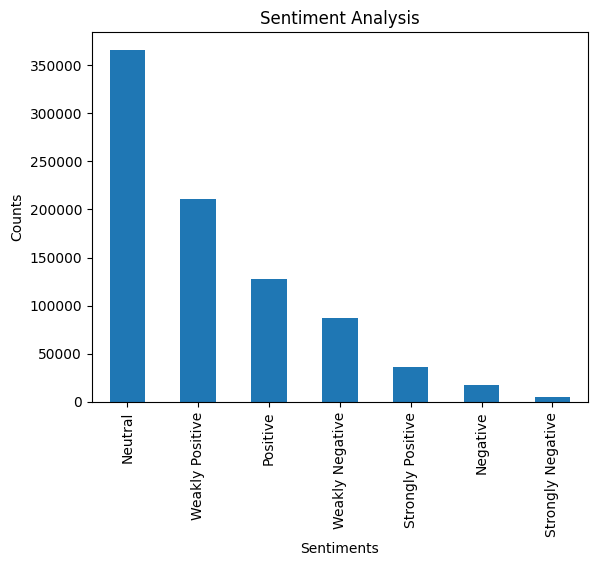

In [14]:
# Plot & viz the sentiment count 

plt.title('Sentiment Analysis')
df_good['Sentiment'].value_counts().plot(kind='bar')
plt.xlabel('Sentiments')
plt.ylabel('Counts')

plt.show()

In [15]:
# Get the count of each article per date 
polarity_count = df_good.groupby(['Date']).count()['Polarity']
polarity = df_good.groupby(['Date']).sum()['Polarity']

polarity_count

Date
05/04/2022    22408
06/04/2022    24331
07/01/2021    27113
07/04/2022    25349
08/01/2021    23870
09/01/2021    18954
10/07/2022    16502
10/10/2021    18433
11/07/2022    21527
11/10/2021    24755
12/07/2022    21480
12/10/2021    22868
13/09/2022    24314
14/04/2021    23521
14/09/2022    21232
15/04/2021    18130
15/09/2022    20371
16/04/2021    20317
17/07/2021    14336
17/12/2020    25580
18/05/2021    13197
18/07/2021    16614
18/12/2020    14859
19/05/2021    70133
19/06/2022    27868
19/07/2021    19211
19/12/2020    13148
20/01/2021    15134
20/06/2022    25173
21/01/2021    18788
21/06/2022    24526
22/01/2021    18740
23/09/2021    21313
24/01/2022    26382
24/09/2021    30915
25/01/2022    20512
25/09/2021    19166
26/01/2022    20828
Name: Polarity, dtype: int64

In [16]:
# Average sentiment for each day over time
polarity_avg = polarity / polarity_count
polarity_avg

Date
05/04/2022    0.124698
06/04/2022    0.112109
07/01/2021    0.099642
07/04/2022    0.115708
08/01/2021    0.104368
09/01/2021    0.105529
10/07/2022    0.116983
10/10/2021    0.148998
11/07/2022    0.101171
11/10/2021    0.120879
12/07/2022    0.101243
12/10/2021    0.124563
13/09/2022    0.093573
14/04/2021    0.120282
14/09/2022    0.103408
15/04/2021    0.126018
15/09/2022    0.109276
16/04/2021    0.117692
17/07/2021    0.132442
17/12/2020    0.109434
18/05/2021    0.135646
18/07/2021    0.174592
18/12/2020    0.119497
19/05/2021    0.098384
19/06/2022    0.102371
19/07/2021    0.147688
19/12/2020    0.114784
20/01/2021    0.102936
20/06/2022    0.104295
21/01/2021    0.102405
21/06/2022    0.107767
22/01/2021    0.103442
23/09/2021    0.147128
24/01/2022    0.086729
24/09/2021    0.146125
25/01/2022    0.093496
25/09/2021    0.170583
26/01/2022    0.091619
Name: Polarity, dtype: float64

In [17]:
# FINAL DF DATE/SENTIMENT/VALUE 

pol = pd.DataFrame(polarity_avg)

# Create a function to compute negative, neutral & positive sentiments 
def getSentiments(score):
    if score <= 0.04:
        return 'Positive --'
    elif score <= 0.05:
        return 'Positive -'
    elif score <= 0.07:
        return 'Positive +'        
    else:
        return 'Positive ++'

# Weighted Sentiments

def getValues(score):
    if score <= 0.04:
        return -3
    elif score <= 0.05:
        return -2
    elif score <= 0.06:
        return 1
    elif score <= 0.08:
        return 2
    elif score <= 0.10:
        return 3
    elif score <= 0.15:
        return 5                   
    else:
        return 7

# Create one new column on df
pol['Sentiment'] = pol['Polarity'].apply(getSentiments)
pol['Value'] = pol['Polarity'].apply(getValues)
pol = pol.iloc[: , 1:]
pol = pol.reset_index(inplace=False)
pol = pol.sort_values(by=['Date'], ascending=True)

pol

,Date,Sentiment,Value
0,05/04/2022,Positive ++,5
1,06/04/2022,Positive ++,5
2,07/01/2021,Positive ++,3
3,07/04/2022,Positive ++,5
4,08/01/2021,Positive ++,5
5,09/01/2021,Positive ++,5
6,10/07/2022,Positive ++,5
7,10/10/2021,Positive ++,5
8,11/07/2022,Positive ++,5
9,11/10/2021,Positive ++,5


In [18]:
import plotly.express as px

df = pol
fig = px.bar(df, x='Date', y='Value', color="Sentiment", title="Sentimental Value Over Time")
fig.show()

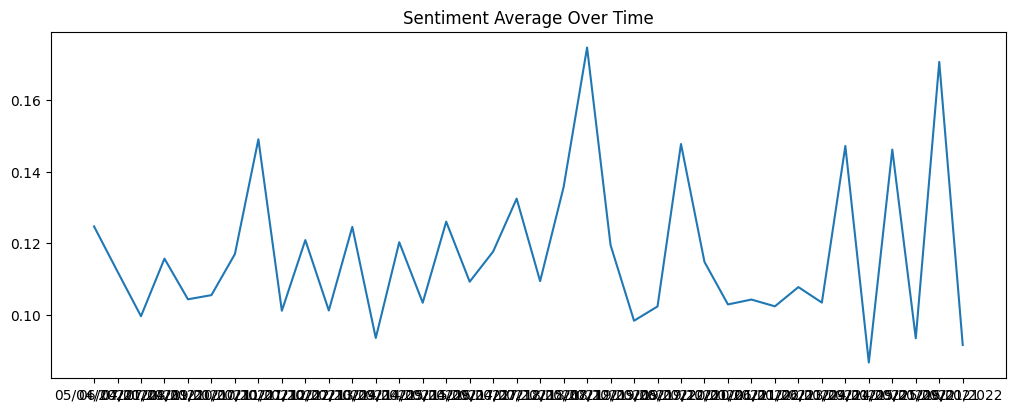

In [19]:
# Plot the average sentiment over time

plt.figure(figsize=(12.33,4.5))
plt.title('Sentiment Average Over Time')
plt.plot(polarity_avg.index, polarity_avg)

In [20]:
pol

,Date,Sentiment,Value
0,05/04/2022,Positive ++,5
1,06/04/2022,Positive ++,5
2,07/01/2021,Positive ++,3
3,07/04/2022,Positive ++,5
4,08/01/2021,Positive ++,5
5,09/01/2021,Positive ++,5
6,10/07/2022,Positive ++,5
7,10/10/2021,Positive ++,5
8,11/07/2022,Positive ++,5
9,11/10/2021,Positive ++,5


# III. **SENTIMENTAL ANALYSIS 2**

In [22]:
df_tweets=pd.read_csv("TKN_FINAL.csv")
df_gg = df_tweets.copy()

df_gg = df_gg.drop('Id Tweet', axis=1)
df_gg = df_gg.drop('Unnamed: 0', axis=1)
df_gg = df_gg.drop('Text', axis=1)
df_gg = df_gg.drop('Display Name', axis=1)
df_gg = df_gg.drop('Like Count', axis=1)
df_gg = df_gg.drop('Vérifié', axis=1)
df_gg = df_gg.drop('Language', axis=1)
df_gg = df_gg.drop('lemmatized_token', axis=1)
df_gg = df_gg.drop('tokens', axis=1)
df_gg = df_gg.drop('tokens_2_text', axis=1)
df_gg = df_gg.drop('lemma', axis=1)

df_gg.head(5)

,Datetime,Username,Clean
0,2020-12-19 23:59:58+00:00,re_tweet,We’re gonna see 30k+ corn sound and some of yo...
1,2020-12-19 23:59:55+00:00,jpstunr,I found a Blue vault in Coin Hunt World coin...
2,2020-12-19 23:59:44+00:00,cococryptotv,RyanSAdams Buy more Bitcoin
3,2020-12-19 23:59:33+00:00,Stock_Farms,pokerstarsgirl MinesMetals Thought So and you ...
4,2020-12-19 23:59:28+00:00,2Strawberries_,MFTUSDT MFTUSDT MFT USDT bitcoin trading crypt...


In [24]:
df_gg.rename(columns = {'Datetime':'Date'}, inplace = True)
df_gg['Date'] = pd.to_datetime(df_gg['Date'])
df_gg['Date'] = df_gg['Date'].dt.strftime('%d/%m/%Y')

df_gg.head(10)

,Date,Username,Clean
0,19/12/2020,re_tweet,We’re gonna see 30k+ corn sound and some of yo...
1,19/12/2020,jpstunr,I found a Blue vault in Coin Hunt World coin...
2,19/12/2020,cococryptotv,RyanSAdams Buy more Bitcoin
3,19/12/2020,Stock_Farms,pokerstarsgirl MinesMetals Thought So and you ...
4,19/12/2020,2Strawberries_,MFTUSDT MFTUSDT MFT USDT bitcoin trading crypt...
5,19/12/2020,hugocesar87,tyler why should I invest in bitcoin I still d...
6,19/12/2020,DeepBlueCrypto,zhusu Hey Su why’s China and South Korea sil...
7,19/12/2020,getmoni_io,The number of bitcoin millionaires increased b...
8,19/12/2020,StutubeTrading,I know my following is pretty small yet but wo...
9,19/12/2020,RobLicker,ToneVays have u checked out or covered fold_ap...


In [25]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

def senti_score_udf(sentence):
    snt = analyser.polarity_scores(sentence)
    return ([snt['neg'], snt['neu'], snt['pos'], snt['compound']])
func_udf2 = udf(senti_score_udf, ArrayType(FloatType()))

df_gd = df_gg.copy()

df_gd = df_gd.withColumn('p_neg', func_udf2(df_gd['Clean'])[0])
df_gd = df_gd.withColumn('p_neu', func_udf2(df_gd['Clean'])[1])
df_gd = df_gd.withColumn('p_pos', func_udf2(df_gd['Clean'])[2])
df_gd = df_gd.withColumn('p_comp', func_udf2(df_gd['Clean'])[3])

df_gd['p_comp'] = df_gd['p_comp'].apply(lambda c: 'pos' if c >=0 else 'neg')

df_gd.show(10)

TypeError: Invalid argument, not a string or column: 0         We’re gonna see 30k+ corn sound and some of yo...
1         I found a Blue vault in Coin Hunt World   coin...
2                               RyanSAdams Buy more Bitcoin
3         pokerstarsgirl MinesMetals Thought So and you ...
4         MFTUSDT MFTUSDT MFT USDT bitcoin trading crypt...
                                ...                        
851893                              Opt out \nBuy bitcoin  
851894    Financial giant State Street has revealed that...
851895    Bitcoin 3Day RSI has broken out of the 20 mont...
851896                     Bitcoin\n\nBig volume drop off. 
851897    Will you be able to handle these NFTS...Lets s...
Name: Clean, Length: 851898, dtype: object of type <class 'pandas.core.series.Series'>. For column literals, use 'lit', 'array', 'struct' or 'create_map' function.

In [31]:
def vadar_sentiment(text):
    """ Calculate and return the nltk vadar (lexicon method) sentiment """
    return analyser.polarity_scores(text)['compound']

# create new column for vadar compound sentiment score
df_gd['vadar compound'] = df_gd['Clean'].apply(vadar_sentiment)

def categorise_sentiment(sentiment, neg_threshold=-0.05, pos_threshold=0.05):
    """ categorise the sentiment value as positive (1), negative (-1) 
        or neutral (0) based on given thresholds """
    if sentiment < neg_threshold:
        label = 'Negative'
    elif sentiment > pos_threshold:
        label = 'Positive'
    else:
        label = 'Neutral'
    return label

# new col with vadar sentiment label based on vadar compound score
df_gd['vadar sentiment'] = df_gd['vadar compound'].apply(categorise_sentiment)

In [32]:
df_gd.head(5)

,Date,Username,Clean,vadar compound,vadar sentiment
0,19/12/2020,re_tweet,We’re gonna see 30k+ corn sound and some of yo...,-0.8555,Negative
1,19/12/2020,jpstunr,I found a Blue vault in Coin Hunt World coin...,0.0000,Neutral
2,19/12/2020,cococryptotv,RyanSAdams Buy more Bitcoin,0.0000,Neutral
3,19/12/2020,Stock_Farms,pokerstarsgirl MinesMetals Thought So and you ...,0.4019,Positive
4,19/12/2020,2Strawberries_,MFTUSDT MFTUSDT MFT USDT bitcoin trading crypt...,0.2732,Positive


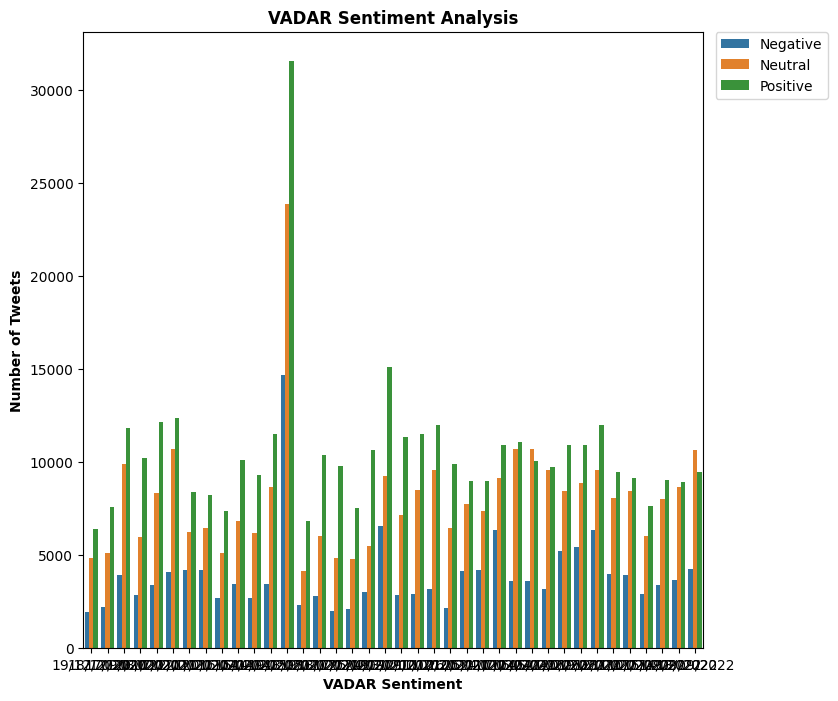

In [37]:
# new col with vadar sentiment label based on vadar compound score
df_gd['vadar sentiment'] = df_gd['vadar compound'].apply(categorise_sentiment)

# plot distribution of article sentiments for each newspaper
plt.figure(figsize=(8,8))
sns.countplot(x='Date', data=df_gd, hue='vadar sentiment')
plt.title('VADAR Sentiment Analysis', weight='bold')
plt.ylabel('Number of Tweets', fontsize=10, weight='bold')
plt.xlabel('VADAR Sentiment', fontsize=10, weight='bold')
plt.legend(bbox_to_anchor=(1.02, 1.0), loc=2, borderaxespad=0.0)
plt.show()